# Example 6 : Manifold Clustering with t-SNE

In a previous example, we looked at some clustering algorithms in scikit-learn. Another well-known clustering algorithm is [t-distributed stochastic neighbor embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), also known as t-SNE. With this particular algorithm, you are trying to reduce a multi-dimensional data set down to a 2D projection by clustering data points that are very similar. This is done with a probability distribution (in this case, the Student's t-distribution) to define the probability that two points in the set are related. By comparing the high dimensional probability to the probability distribution of the points in the 2D projection, one is left with a minimization problem that informs how the algorithm should move the points around in the 2D projection. This is a bit of an oversimplification of how the algorithm works, but hopefully, it gives a bit of an idea of what is going on. 

While there is an implementation of t-SNE inside of scikit-learn, we will use an optimized implementation using the package [openTSNE](https://opentsne.readthedocs.io/en/stable/index.html). First, we will look at using openTSNE by performing an embedding using mostly default options on some artificial data. As always, we start with our usual initial setup and imports.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200 # bigger figures

# Use more REVTEX-esque fonts
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIXGeneral"
mpl.rcParams["mathtext.fontset"] = "stix"

# Simple Case of Three Normal Distributions

Perhaps the first test one should try with t-SNE is to see what the algorithm does on a 2D dataset, which comprises already clustered points (three 2D Gaussian distributions). Using numpy, let's generate a few hundred points using three normal distributions with distinct centroids and no real overlap. We can also set up an array to help us color the three distributions so we can see they are distinct with no overlap.

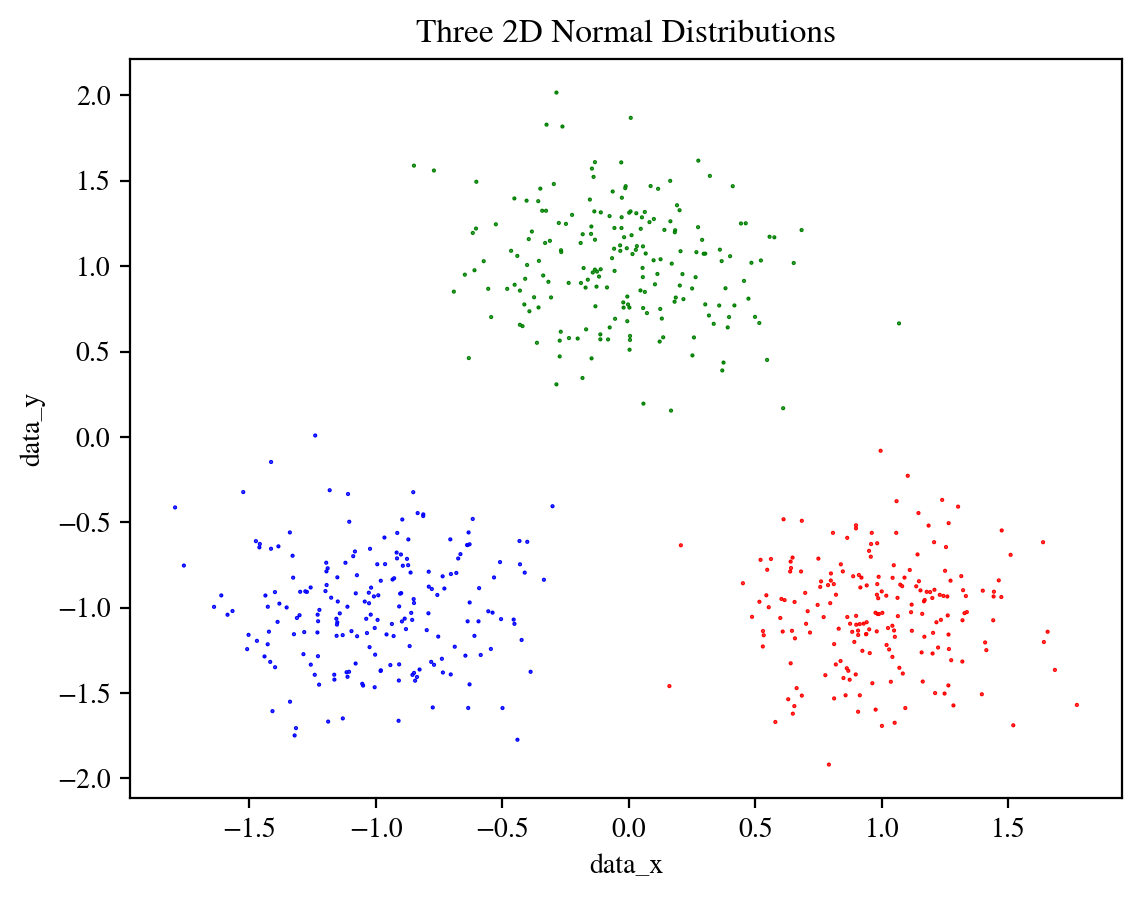

In [2]:
rng = np.random.default_rng(1729)

test_r = rng.multivariate_normal([1.0,-1.0], [[0.1,0],[0,0.1]], size=200)
test_b = rng.multivariate_normal([-1.0,-1.0], [[0.1,0],[0,0.1]], size=200)
test_g = rng.multivariate_normal([0.0,1.0], [[0.1,0],[0,0.1]], size=200)
col_tag = np.concatenate((np.tile('r', 200),np.tile('b', 200),np.tile('g', 200))) 
test_data = np.concatenate((test_r,test_b,test_g))

plt.title('Three 2D Normal Distributions')
plt.scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
plt.xlabel('data_x')
plt.ylabel('data_y')
plt.show()

Next, we will define our t-SNE embedding and see what the algorithm does to the above data set. It should be noted that openTSNE expects data to be in the form of a numpy array. If our data was in a dataframe, one could use the inbuilt pandas function to convert it to a numpy array.

```python
data_np = data_dataframe.to_numpy()
```

Let's use the default settings of the openTSNE embedding and see how our test set changes. One option we will use is giving the embedding a fixed random seed, which means the embeddings will be the same every time you run this notebook. This first calculation will take a few seconds (as you will see from the output of the cell magic %%time command); however, the more data points in general, the longer t-SNE will take.

In [3]:
from openTSNE import TSNE

tsne = TSNE(random_state=42) # Use all the defaults of the regular embedding but fixed random state for reproducibility

In [4]:
%%time 
tsne_embed = tsne.fit(test_data)

CPU times: total: 10.4 s
Wall time: 10.8 s


After using fit, the embedding will return a 2D numpy array that we can plot in matplotlib. We will plot the first t-SNE component on the x-axis and the second t-SNE  component on the y-axis. Using the col_tag array we can compare what the t-SNE did to the points of each of the three distributions.

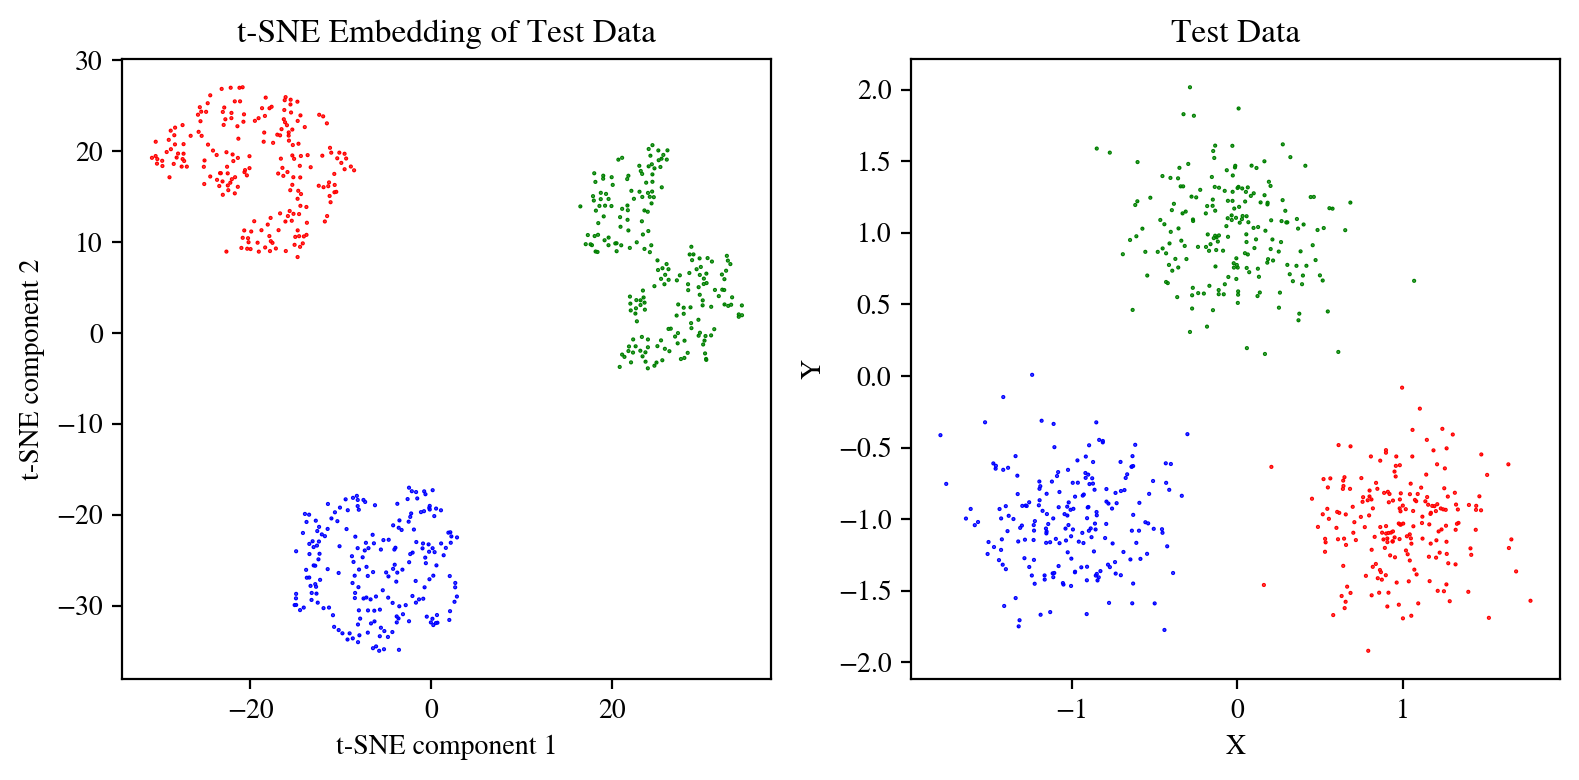

In [5]:
fig, ax = plt.subplots(1,2)
#
ax[0].set_title('t-SNE Embedding of Test Data')
ax[0].scatter(tsne_embed[:,0], tsne_embed[:,1], marker='.', s=1, color=col_tag)
ax[0].set_xlabel('t-SNE component 1')
ax[0].set_ylabel('t-SNE component 2')
#
ax[1].set_title('Test Data')
ax[1].scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

fig.set_size_inches(8,4)
plt.tight_layout()
plt.show()

Not surprinsingly, we started with three seperate normal distributions which had no overlap and the t-SNE embedding has returned three clusters each containing a single color. Something that is interesting with the t-SNE result is it looks like the mean distance between the clusters has increased. We can add a little more complexity by making our 2D distributions multivariate.

# The Slightly More Interesting Case of Three Multivariate Normal Distributions

In addition to making our distributions multivariate, we will push our distributions so we have some overlap between the red and green distributions, and the blue points will have only minimal overlap with the red. We can also increase the overall number of points of each set to get some idea of how t-SNE is going to scale with the number of points (say, increase the number of points by a factor of 5).

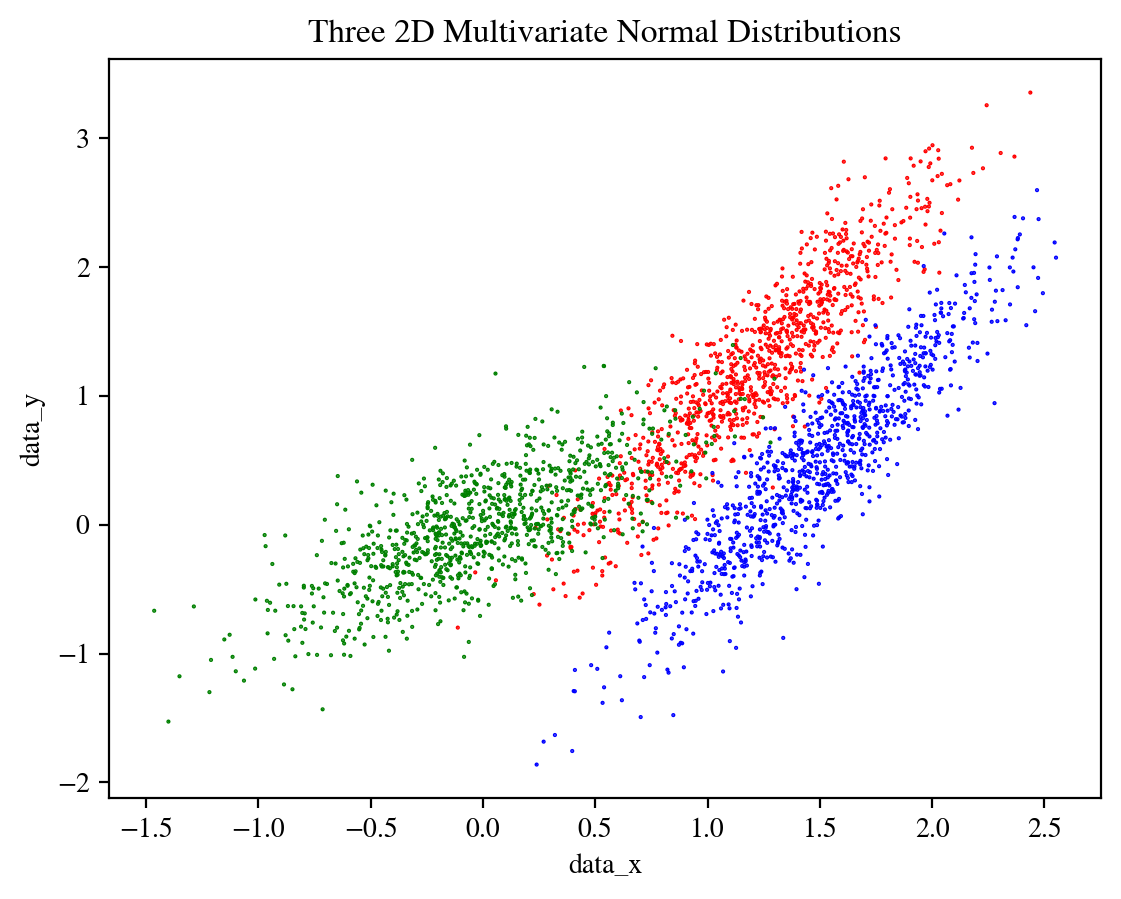

In [6]:
rng = np.random.default_rng()

test_r = rng.multivariate_normal([1.2,1.2], [[0.15,0.25],[0.25,0.5]], size=1000)
test_b = rng.multivariate_normal([1.5,0.5], [[0.15,0.25],[0.25,0.5]], size=1000)
test_g = rng.multivariate_normal([0.0,0.0], [[0.2,0.15],[0.15,0.2]], size=1000)
col_tag = np.concatenate((np.tile('r', 1000),np.tile('b', 1000),np.tile('g', 1000))) 
test_data = np.concatenate((test_r,test_b,test_g))

plt.title('Three 2D Multivariate Normal Distributions')
plt.scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
plt.xlabel('data_x')
plt.ylabel('data_y')
plt.show()

In [7]:
%%time 
tsne_embed = tsne.fit(test_data)

CPU times: total: 1min 23s
Wall time: 1min 28s


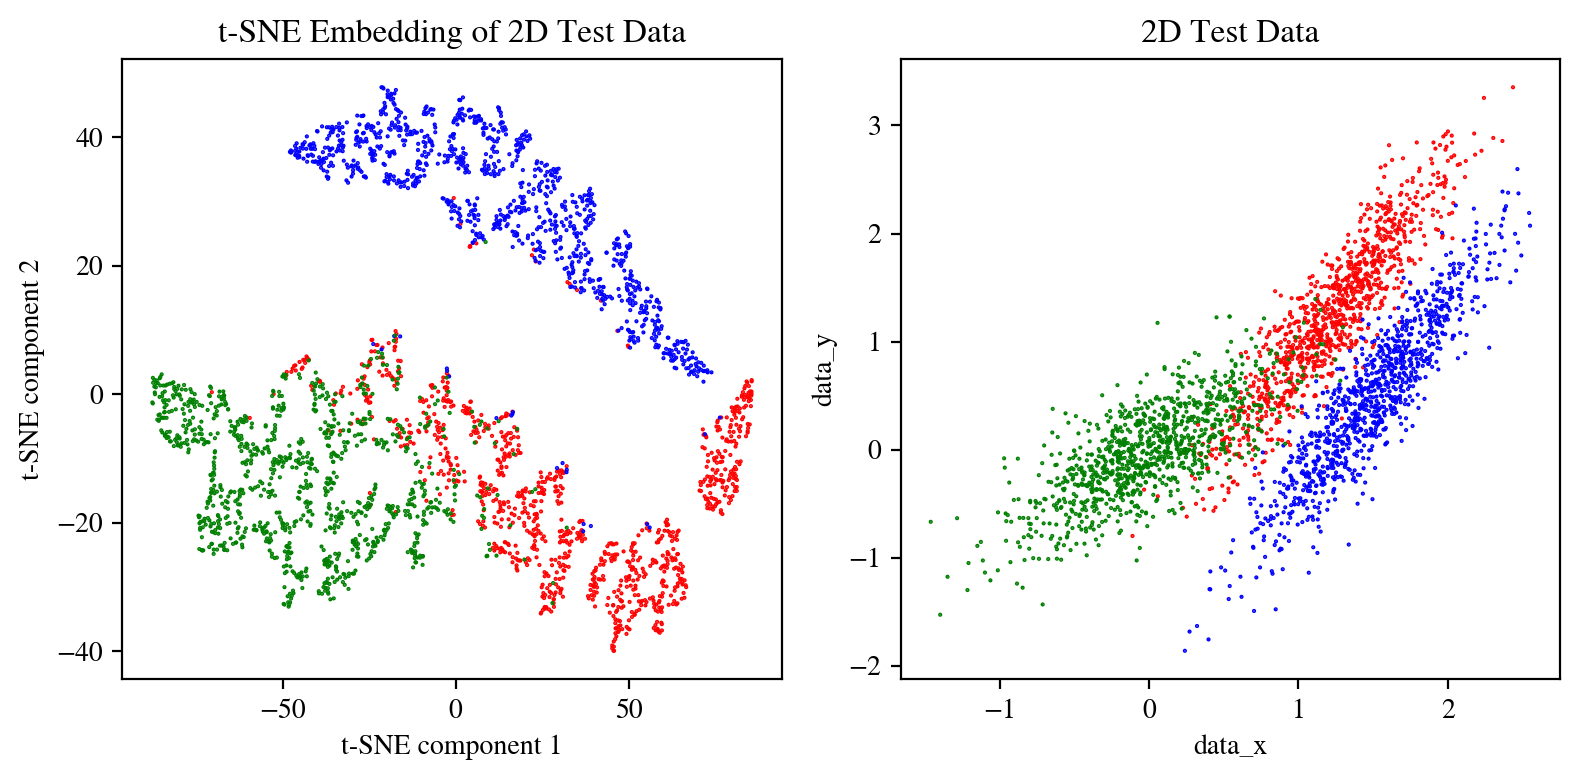

In [8]:
fig, ax = plt.subplots(1,2)
#
ax[0].set_title('t-SNE Embedding of 2D Test Data')
ax[0].scatter(tsne_embed[:,0], tsne_embed[:,1], marker='.', s=1, color=col_tag)
ax[0].set_xlabel('t-SNE component 1')
ax[0].set_ylabel('t-SNE component 2')
#
ax[1].set_title('2D Test Data')
ax[1].scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
ax[1].set_xlabel('data_x')
ax[1].set_ylabel('data_y')

fig.set_size_inches(8,4)
plt.tight_layout()
plt.show()

With 3,000 points vs 600 points, the time for embedding increased by slightly more than a factor of seven. It should be noted that openTSNE, by default, will only use one thread. If we use the n_job option, we can allow openTSNE to run over more threads, speeding up the computation. Comparing the above plot with the simpler case of the three Gaussians, we can see that t-SNE was able to separate the red and blue distributions, but the points that overlapped between the two are not so easily clustered. Things are a little more contentious for the red and green distributions. If you only have 2D data, t-SNE will cluster similarly to density-based clustering, though probably not as efficiently.

What if each of the three distributions we plotted above also has three additional parameters? Given a 5D dataset, which still contains the data_x and data_y sets we plotted above, how will t-SNE cluster the data? 

# Moving Beyond 2D - Extending our Example to a 5D Datasets

We will extend our 2D data by adding in three extra parameters $\alpha$, $\beta$, and $\gamma$, which will vary for each of the three multivariate distributions. The red and green distributions will have some overlap in the $\alpha$ parameter. The blue and green will overlap in the $\beta$ parameter. The $\gamma$ parameter will have only a minor overlap between the red, blue, and green distributions. Building arrays from these parameters, we will add them to our original 2D data set, which had only the data_x and data_y arrays. We are giving out t-SNE embedding more information to try to cluster between the three colors.

In [9]:
# Alpha
alpha_r = rng.normal(5.0,1.0,1000)
alpha_b = rng.normal(5.2,0.9,1000)
alpha_g = rng.normal(8.0,1.0,1000)
# Beta
beta_r = rng.normal(3.0,1.0,1000)
beta_b = rng.normal(7.0,1.5,1000)
beta_g = rng.normal(2.8,0.8,1000)
# Gamma
gamma_r = rng.normal(1.0,0.5,1000)
gamma_b = rng.normal(3.0,0.6,1000)
gamma_g = rng.normal(5.0,0.4,1000)
#
alpha_data = np.concatenate((alpha_r,alpha_b,alpha_g))
beta_data = np.concatenate((beta_r,beta_b,beta_g))
gamma_data = np.concatenate((gamma_r,gamma_b,gamma_g))

In [10]:
# lazy way of bringing the individual arrays into a single numpy array
test_data_dict = {'data_x':test_data[:,0], 'data_y':test_data[:,1], 'alpha':alpha_data, 'beta':beta_data, 'gamma':gamma_data}
df_test = pd.DataFrame(test_data_dict)
np_test = df_test.to_numpy()

To better understand the problem we have set up, we can make some 2D histograms across the different arrays. If you want to relate this to something like MUSIC data, you could think of data_x and data_y as something analogous to a total E and $\delta$ E to try and find events in say strip 2, with the $\alpha$, $\beta$, and $\gamma$ parameters then being different combinations of anode strips to try and separate potential fusion events.

In [11]:
from matplotlib.colors import LogNorm

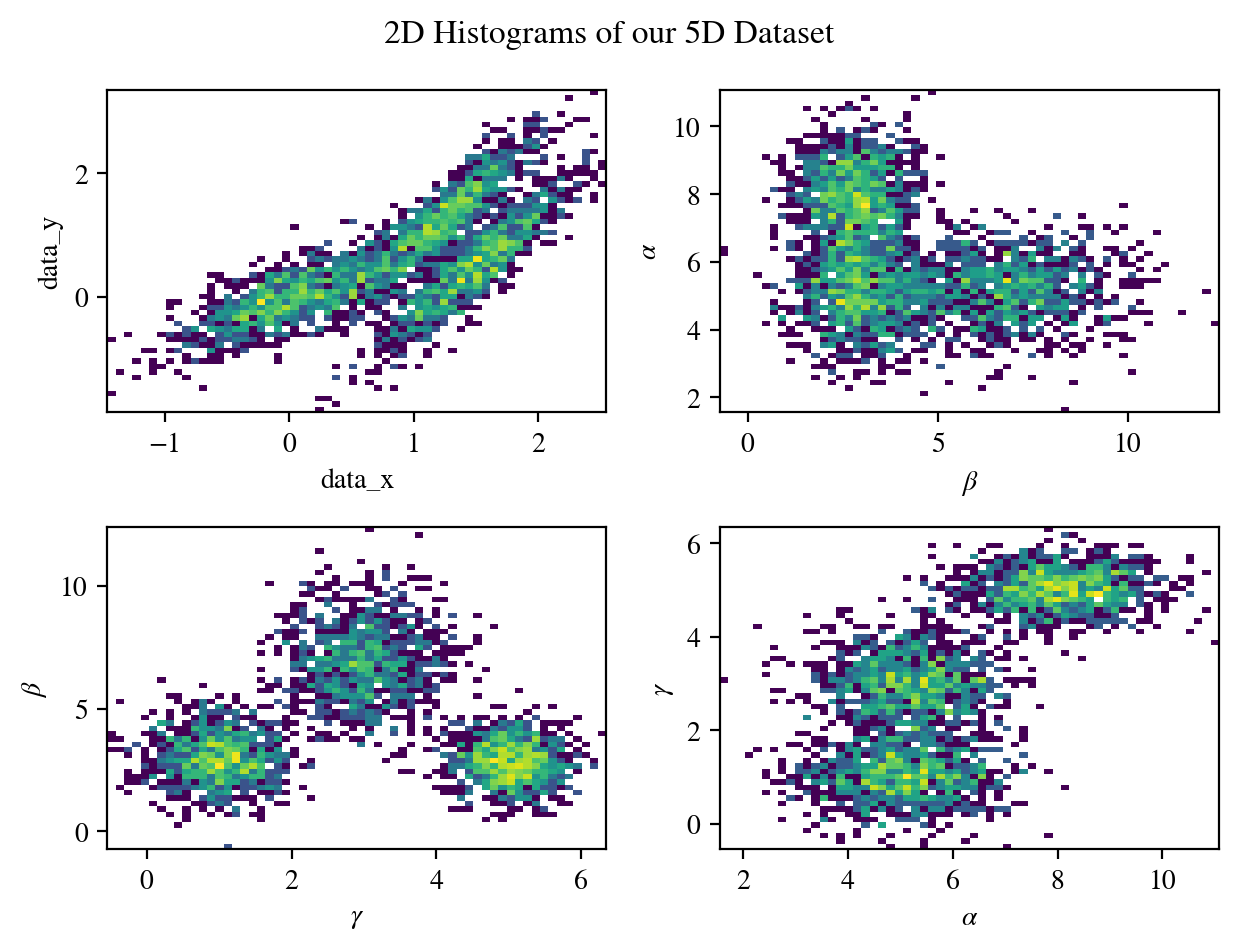

In [12]:
fig, ax = plt.subplots(2,2)
fig.suptitle('2D Histograms of our 5D Dataset')

ax[0,0].hist2d(test_data[:,0],test_data[:,1], bins=60, norm=LogNorm())
ax[0,0].set_xlabel('data_x')
ax[0,0].set_ylabel('data_y')
#
ax[0,1].hist2d(beta_data, alpha_data, bins=60, norm=LogNorm())
ax[0,1].set_xlabel(r'$\beta$')
ax[0,1].set_ylabel(r'$\alpha$')
#
ax[1,0].hist2d(gamma_data, beta_data, bins=60, norm=LogNorm())
ax[1,0].set_xlabel(r'$\gamma$')
ax[1,0].set_ylabel(r'$\beta$')
#
ax[1,1].hist2d(alpha_data, gamma_data, bins=60, norm=LogNorm())
ax[1,1].set_xlabel(r'$\alpha$')
ax[1,1].set_ylabel(r'$\gamma$')

plt.tight_layout()
plt.show()

Looking at the histogram for data_y vs. data_x (where I have chosen the number of bins to illustrate a point rather than optimize the separation of blobs within the plot) we see two formations. However, in our parameters, histograms $\beta$ vs. $\gamma$ and $\gamma$ vs. $\alpha$ show three formations, with $\alpha$ vs $\beta$ not clear cut whether you are seeing two or three formations. Given this, what will the t-SNE embedding do? 

In [13]:
%%time 
tsne_embed = tsne.fit(np_test)

CPU times: total: 1min 21s
Wall time: 1min 23s


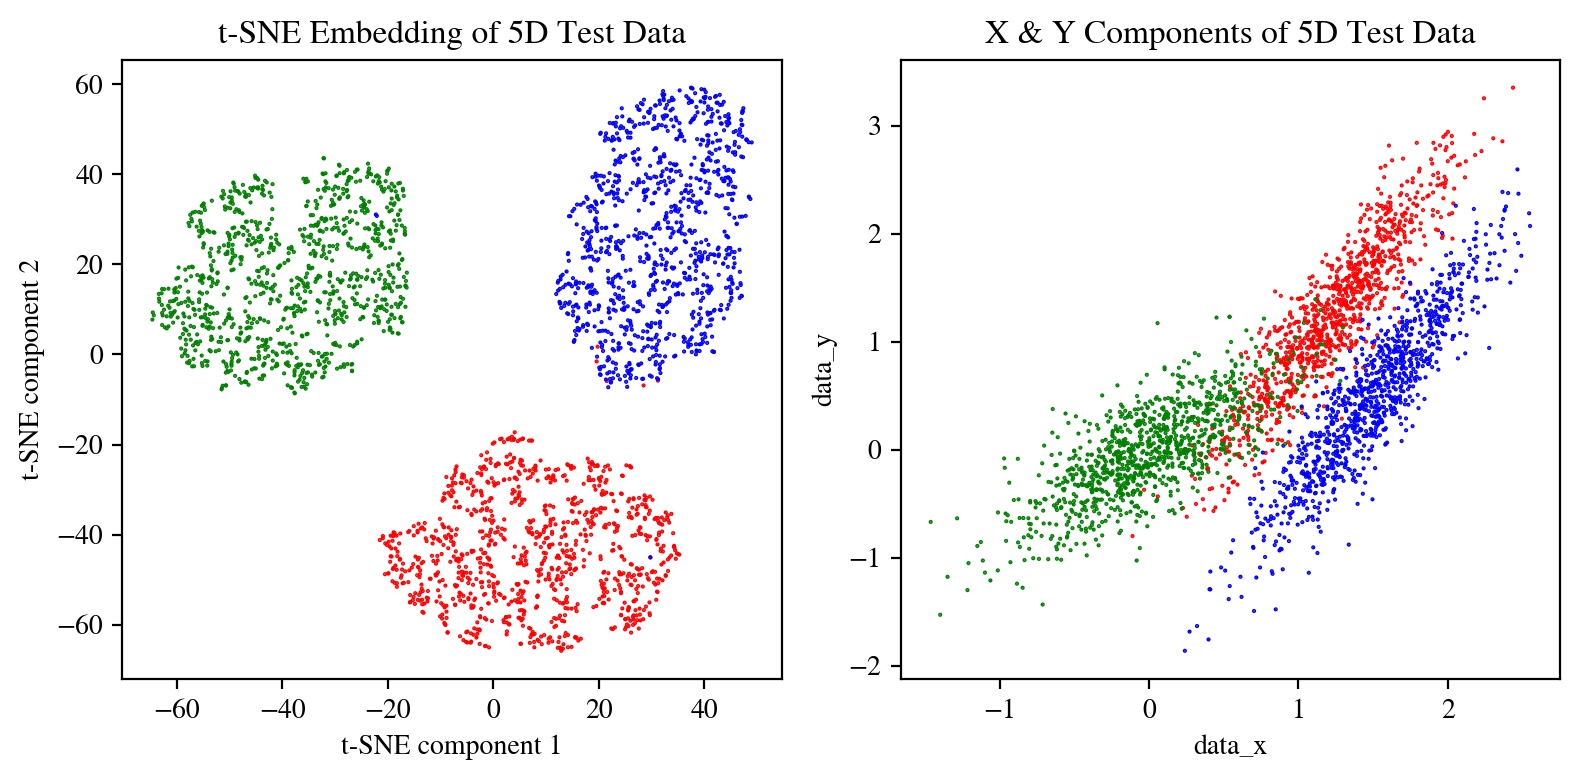

In [14]:
fig, ax = plt.subplots(1,2)
#
ax[0].set_title('t-SNE Embedding of 5D Test Data')
ax[0].scatter(tsne_embed[:,0], tsne_embed[:,1], marker='.', s=1, color=col_tag)
ax[0].set_xlabel('t-SNE component 1')
ax[0].set_ylabel('t-SNE component 2')
#
ax[1].set_title('X & Y Components of 5D Test Data')
ax[1].scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
ax[1].set_xlabel('data_x')
ax[1].set_ylabel('data_y')

fig.set_size_inches(8,4)
plt.tight_layout()
plt.show()

# Trying t-SNE with MUSIC Data

Let's see what t-SNE will look like on some MUSIC data. Up to this point, we have been using all the default options for openTSNE embedding. We just tried the defaults for the simple examples, and they work well enough. For "real data" with noise and contaminants, we must be more mindful of our choice of t-SNE parameters. Luckily, the documentation for openTSNE has a handy guide dedicated to the embedding parameters, what they do, how they work, and some ideas on when to play around with them.

## Choosing Embedding Parameters

For a more detailed explanation of the t-SNE embedding parameters, see the [openTSNE parameter guide.](https://opentsne.readthedocs.io/en/stable/parameters.html). I will briefly mention some quick thoughts on two parameters while using t-SNE on MUSIC data: perplexity and exaggeration. As stated in the openTSNE guide, perplexity often affects the resulting embedding most. With MUSIC data, we know for fusion-like events, you generally have three aspects to the trace: the beam-like part, the "plateau" where the trace goes above the beam for some number of strips, and finally, the trace will most likely go to zero as the higher Z nuclei you produced stops inside of MUSIC. The difficulty comes from that part of your fusion trace will look like a beam. Still, simultaneously, you would like to see differences in the plateau of the trace to distinguish between fusion and the "fusion doppelgangers" (elastic scatters, contaminants, etc...). In a nutshell, don't be too afraid to experiment with larger perplexity values. Smaller perplexity values should focus more on local effects, and larger ones should focus more on global effects. However, there is no hard edge; what works for one experiment will not exactly translate to another. Don't default to 30. Try a range of values and see what it does to the clustering.

The same principle works for exaggeration, which, in openTSNE, you can apply in two stages. If you do not see clustering from applying t-SNE, don't be afraid to increase the early exaggeration a bit before you start including exaggeration in the second stage. But in general, whatever strength of exaggeration you use in the first stage, you typically should use a smaller value in the second stage (in general, use early_exaggeration > exaggeration) as you don't want to constrict openTSNE too much from being able to move points around in the second stage of the embedding. 

Again, these are not rules set in stone, just some general guidelines to try first based on previous t-SNE clustering of MUSIC data.

## Scaling MUSIC Data